# Ferrario Gabriele 817518 Assignment 2 
____
### Roadmap:
- Data Loading 
- Data Preprocessing
- Model Definition
- Training
- Regularization
- Test with Feature Selection
- Test Prediction

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import keras.backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation, LeakyReLU
from tensorflow.keras.activations import sigmoid
from tensorflow.keras import regularizers

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras import layers

### Data Loading 

In [86]:
x_train = pd.read_csv("X_train.csv", index_col=False)
x_train_originale=x_train

In [87]:
x_train

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,21754,80000.0,2,2,2,24,0,0,0,0,...,78321.0,73731.0,39643.0,39457.0,3503.0,5001.0,2092.0,1218.0,1445.0,878.0
1,252,30000.0,1,2,2,28,0,0,0,0,...,29155.0,25255.0,22001.0,0.0,5006.0,1244.0,851.0,955.0,0.0,0.0
2,22942,180000.0,2,5,1,44,0,0,-1,-1,...,850.0,0.0,6881.0,10340.0,0.0,850.0,0.0,6881.0,10340.0,182.0
3,619,60000.0,1,1,2,25,0,0,0,0,...,38533.0,39639.0,39619.0,39140.0,2018.0,1900.0,2000.0,1500.0,1900.0,2000.0
4,17091,130000.0,2,2,2,25,0,0,0,0,...,114734.0,117823.0,120854.0,123904.0,4100.0,4200.0,5000.0,5000.0,5000.0,10700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,29803,50000.0,1,2,2,32,0,0,0,0,...,55739.0,55957.0,29238.0,6119.0,2000.0,3000.0,1591.0,72.0,1134.0,73421.0
23996,5391,200000.0,1,1,2,37,2,2,2,2,...,168386.0,164182.0,169029.0,172084.0,13500.0,6000.0,0.0,7500.0,6000.0,4000.0
23997,861,50000.0,1,1,2,26,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23998,15796,70000.0,2,2,2,25,0,0,0,0,...,51152.0,35122.0,28633.0,28039.0,3000.0,2000.0,4500.0,1200.0,0.0,1200.0


In [88]:
y_train = pd.read_csv("Y_train.csv", index_col=False)
y_train

,ID,default.payment.next.month
0,21754,0
1,252,0
2,22942,0
3,619,0
4,17091,0
...,...,...
23995,29803,0
23996,5391,1
23997,861,0
23998,15796,1


In [89]:
x_train= pd.merge(x_train, y_train, on='ID')
x_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,21754,80000.0,2,2,2,24,0,0,0,0,...,73731.0,39643.0,39457.0,3503.0,5001.0,2092.0,1218.0,1445.0,878.0,0
1,252,30000.0,1,2,2,28,0,0,0,0,...,25255.0,22001.0,0.0,5006.0,1244.0,851.0,955.0,0.0,0.0,0
2,22942,180000.0,2,5,1,44,0,0,-1,-1,...,0.0,6881.0,10340.0,0.0,850.0,0.0,6881.0,10340.0,182.0,0
3,619,60000.0,1,1,2,25,0,0,0,0,...,39639.0,39619.0,39140.0,2018.0,1900.0,2000.0,1500.0,1900.0,2000.0,0
4,17091,130000.0,2,2,2,25,0,0,0,0,...,117823.0,120854.0,123904.0,4100.0,4200.0,5000.0,5000.0,5000.0,10700.0,0


### Data Preprocessing
Ho eliminato le istanze che presentavano valori scorretti del campo EDUCATION

In [90]:
# elimino righe con valore 0
x_train["EDUCATION"].value_counts()

2    11186
1     8481
3     3959
5      224
4       97
6       43
0       10
Name: EDUCATION, dtype: int64

In [91]:
x_train = x_train.loc[(x_train["EDUCATION"]!=0)]

Ho eliminato le istanze che presentavano un valore scorretto del campo MARRIAGE

In [92]:
# elimino valori scorretti
x_train["MARRIAGE"].value_counts()

2    12740
1    10939
3      266
0       45
Name: MARRIAGE, dtype: int64

In [93]:
x_train = x_train.loc[(x_train["MARRIAGE"]!=0)]

In [94]:
# la target è sbilanciata
x_train["default.payment.next.month"].value_counts()

0    18626
1     5319
Name: default.payment.next.month, dtype: int64

In [95]:
def undersampling(df):
    _, uno= df["default.payment.next.month"].value_counts()
    df_0 = df[df["default.payment.next.month"] == 0]
    df_0 = df_0.sample(uno, random_state=1)
    df_1 = df[df["default.payment.next.month"] == 1]
    df = pd.concat([df_0, df_1])
    return df

In [96]:
# Undersampling per bilanciare la distribuzione della target
x_train = undersampling(x_train)
x_train["default.payment.next.month"].value_counts()

1    5319
0    5319
Name: default.payment.next.month, dtype: int64

In [97]:
x_train.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Analizzo le statistiche descrittive e trasformo le features ridimensionandole in un intervallo [0, 1].

In [98]:
x_train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,...,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000
mean,14889.279376,153099.612709,1.589773,1.877233,1.542019,35.653976,0.229460,0.084038,0.019459,-0.048411,...,41847.889547,39265.327129,38072.214796,4779.629254,4864.399135,4498.854672,4293.965407,4340.685373,4524.295920,0.500000
std,8610.735784,126296.685369,0.491898,0.776625,0.520404,9.437111,1.273123,1.347384,1.330183,1.316226,...,63408.173834,60029.411938,58686.214894,14419.128682,15167.943310,17114.165006,14714.775797,15523.478948,16135.657577,0.500024
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-94625.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7431.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2277.250000,1672.500000,1200.750000,390.000000,390.000000,100.250000,3.000000,0.000000,0.000000,0.000000
50%,14913.500000,120000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18965.000000,18280.000000,17445.500000,2000.000000,2000.000000,1500.000000,1200.000000,1300.000000,1170.000000,0.500000
75%,22167.750000,220000.000000,2.000000,2.000000,2.000000,42.000000,1.000000,0.000000,0.000000,0.000000,...,50790.000000,48629.750000,48159.500000,4595.250000,4300.000000,4000.000000,3500.000000,3507.750000,3500.000000,1.000000
max,29999.000000,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,401003.000000,896040.000000,528897.000000,417990.000000,527143.000000,1.000000


In [99]:
def preprocess_data(X, scaler=None):
    if not scaler:
        scaler =  MinMaxScaler()
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

In [100]:
y_train = x_train["default.payment.next.month"]
x_train = x_train.drop(['default.payment.next.month'], axis=1)
x_train = x_train.drop(['ID'], axis=1)

In [101]:
x_train_pulito=x_train
y_train_finale=y_train
x_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
18590,10000.0,1,2,2,27,1,-1,0,0,0,...,4428.0,6368.0,9046.0,10000.0,4475.0,2000.0,2000.0,2780.0,2000.0,0.0
10898,330000.0,2,1,2,31,-1,0,0,0,0,...,5731.0,5186.0,6522.0,8995.0,1091.0,2000.0,1222.0,2400.0,3000.0,2000.0
18252,240000.0,2,1,1,53,-2,-2,-1,-1,-2,...,2007.0,-40.0,-40.0,8091.0,0.0,2007.0,40.0,0.0,8131.0,0.0
267,20000.0,2,1,2,23,0,0,2,0,0,...,8279.0,8444.0,8621.0,8868.0,2424.0,0.0,284.0,294.0,371.0,500.0
2210,20000.0,1,2,2,24,1,3,2,2,3,...,7187.0,8367.0,7945.0,7669.0,0.0,0.0,1300.0,0.0,0.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,280000.0,2,1,1,32,1,-2,-1,0,0,...,3508.0,3508.0,-200.0,-200.0,0.0,3508.0,0.0,0.0,0.0,0.0
23993,160000.0,2,2,1,42,0,0,0,0,0,...,170142.0,119529.0,122059.0,111378.0,8450.0,5289.0,4022.0,4195.0,3986.0,3958.0
23996,200000.0,1,1,2,37,2,2,2,2,2,...,168386.0,164182.0,169029.0,172084.0,13500.0,6000.0,0.0,7500.0,6000.0,4000.0
23998,70000.0,2,2,2,25,0,0,0,0,2,...,51152.0,35122.0,28633.0,28039.0,3000.0,2000.0,4500.0,1200.0,0.0,1200.0


In [102]:
x_train, x_scaler = preprocess_data(x_train)

In [103]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.1, random_state=0)

In [104]:
def f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [105]:
def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))
get_custom_objects().update({'gelu': Activation(gelu)})

# Add the alpha parameter of the Leaky-Relu function

get_custom_objects().update({'leaky-relu': Activation(LeakyReLU(alpha=0.2))})

# Add the Swish function

def swish(x, beta = 1):
    return (x * sigmoid(beta * x))
get_custom_objects().update({'swish': Activation(swish)})

act_func = ['relu', 'elu', 'leaky-relu', 'selu', 'gelu', 'swish']


In [106]:
initializer = tf.keras.initializers.GlorotUniform(seed=1) 

def NeuralNetwork(X, activation):
    inputs = keras.Input(shape = (x_train.shape[1]))
    x = layers.Dense(13, activation = activation, kernel_initializer=initializer) (inputs)
    x = layers.Dense(6, activation = activation, kernel_initializer=initializer) (x)
    x = layers.Dense(1, activation= "sigmoid", kernel_initializer=initializer) (x)
    model = keras.Model(inputs, x)
    model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=["accuracy", f1])
    return model

In [23]:
x_train.shape[1]

23

Scelgo l'activation function migliore

In [24]:
result = []
for activation in act_func:
    print('\nTraining with -->{0}<-- activation function\n'.format(activation))
    model = NeuralNetwork(x_train, activation)
    
    history = model.fit(x_train, y_train,
          batch_size=16,
          epochs=20,
          verbose=1,
          validation_data=(x_validation, y_validation))
    
    result.append(history)
    
    K.clear_session()
    del model


Training with -->relu<-- activation function

Epoch 1/20
599/599 [==============================] - 2s 3ms/step - loss: 0.6591 - accuracy: 0.6213 - f1: 0.5292 - val_loss: 0.6337 - val_accuracy: 0.6532 - val_f1: 0.6320
Epoch 2/20
599/599 [==============================] - 1s 2ms/step - loss: 0.6189 - accuracy: 0.6565 - f1: 0.6215 - val_loss: 0.6168 - val_accuracy: 0.6711 - val_f1: 0.6295
Epoch 3/20
599/599 [==============================] - 1s 2ms/step - loss: 0.6046 - accuracy: 0.6705 - f1: 0.6227 - val_loss: 0.6032 - val_accuracy: 0.6870 - val_f1: 0.6332
Epoch 4/20
599/599 [==============================] - 2s 3ms/step - loss: 0.5963 - accuracy: 0.6822 - f1: 0.6230 - val_loss: 0.5955 - val_accuracy: 0.6964 - val_f1: 0.6227
Epoch 5/20
599/599 [==============================] - 2s 4ms/step - loss: 0.5893 - accuracy: 0.6922 - f1: 0.6317 - val_loss: 0.5912 - val_accuracy: 0.7002 - val_f1: 0.6471
Epoch 6/20
599/599 [==============================] - 1s 2ms/step - loss: 0.5860 - accuracy: 

Epoch 14/20
599/599 [==============================] - 3s 4ms/step - loss: 0.5849 - accuracy: 0.6970 - f1: 0.6351 - val_loss: 0.5938 - val_accuracy: 0.7002 - val_f1: 0.6344
Epoch 15/20
599/599 [==============================] - 2s 3ms/step - loss: 0.5847 - accuracy: 0.6983 - f1: 0.6328 - val_loss: 0.5921 - val_accuracy: 0.6936 - val_f1: 0.6316
Epoch 16/20
599/599 [==============================] - 3s 5ms/step - loss: 0.5839 - accuracy: 0.6966 - f1: 0.6332 - val_loss: 0.5898 - val_accuracy: 0.6992 - val_f1: 0.6525
Epoch 17/20
599/599 [==============================] - 2s 3ms/step - loss: 0.5836 - accuracy: 0.6973 - f1: 0.6337 - val_loss: 0.5944 - val_accuracy: 0.6983 - val_f1: 0.6272
Epoch 18/20
599/599 [==============================] - 2s 4ms/step - loss: 0.5829 - accuracy: 0.6968 - f1: 0.6345 - val_loss: 0.5885 - val_accuracy: 0.6983 - val_f1: 0.6520
Epoch 19/20
599/599 [==============================] - 2s 3ms/step - loss: 0.5817 - accuracy: 0.6986 - f1: 0.6416 - val_loss: 0.5886 - 

<Figure size 720x504 with 0 Axes>

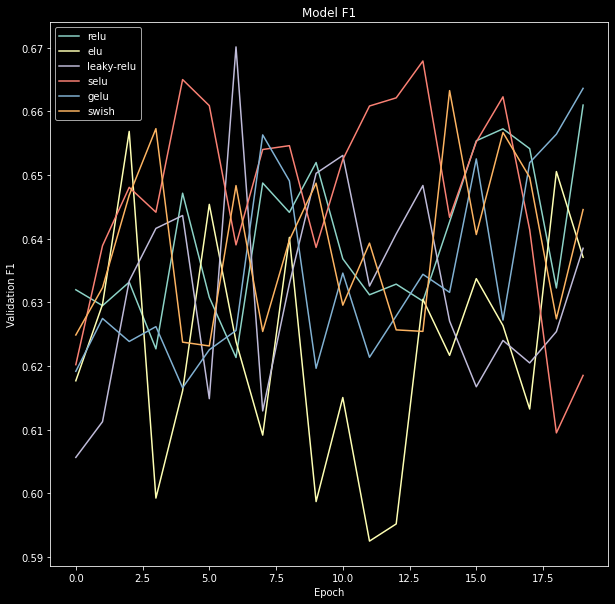

In [25]:
f1_finale = []

def risultati(activation_function, rmse):
    for i in range(len(activation_function)):
        print('RMSE of the activation function {} is {}'.format(activation_function[i], round(rmse[i], 5)))
        
def plot_act_func_results(results, activation_functions = []):
    plt.figure(figsize=(10,7))
    plt.style.use('dark_background')
    
    plt.figure(figsize=(10,10))
    
    for act_func in results:
        plt.plot(act_func.history['val_f1'])
        f1_finale.append(act_func.history['val_f1'][-1])
    
    plt.title('Model F1')
    plt.ylabel('Validation F1')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

plot_act_func_results(result, act_func)

In [26]:
activation= "relu"

### Model Definition

In [27]:
inputs = keras.Input(shape = (x_train.shape[1]))
x = layers.Dense(32, activation = activation, kernel_initializer=initializer) (inputs)
x = layers.Dense(16, activation = activation, kernel_initializer=initializer) (x)
x = layers.Dense(1, activation= "sigmoid", kernel_initializer=initializer) (x)
model = keras.Model(inputs, x)
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=["accuracy", f1]) 

In [28]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 23)]              0         
_________________________________________________________________
dense (Dense)                (None, 32)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


### Training

In [29]:
history = model.fit(x_train, y_train, batch_size=16, epochs=100, verbose=1, validation_data=(x_validation, y_validation))

Epoch 1/100
599/599 [==============================] - 2s 4ms/step - loss: 0.6421 - accuracy: 0.6320 - f1: 0.6048 - val_loss: 0.6319 - val_accuracy: 0.6645 - val_f1: 0.5610
Epoch 2/100
599/599 [==============================] - 2s 3ms/step - loss: 0.6027 - accuracy: 0.6688 - f1: 0.6046 - val_loss: 0.6010 - val_accuracy: 0.6842 - val_f1: 0.6120
Epoch 3/100
599/599 [==============================] - 2s 3ms/step - loss: 0.5924 - accuracy: 0.6877 - f1: 0.6151 - val_loss: 0.5910 - val_accuracy: 0.6974 - val_f1: 0.6312
Epoch 4/100
599/599 [==============================] - 2s 4ms/step - loss: 0.5864 - accuracy: 0.6911 - f1: 0.6191 - val_loss: 0.5878 - val_accuracy: 0.6955 - val_f1: 0.6346
Epoch 5/100
599/599 [==============================] - 2s 3ms/step - loss: 0.5836 - accuracy: 0.6983 - f1: 0.6286 - val_loss: 0.5901 - val_accuracy: 0.6983 - val_f1: 0.6420
Epoch 6/100
599/599 [==============================] - 2s 3ms/step - loss: 0.5808 - accuracy: 0.6977 - f1: 0.6318 - val_loss: 0.5835 - 

599/599 [==============================] - 3s 4ms/step - loss: 0.5346 - accuracy: 0.7281 - f1: 0.6895 - val_loss: 0.5923 - val_accuracy: 0.7011 - val_f1: 0.6649
Epoch 96/100
599/599 [==============================] - 2s 4ms/step - loss: 0.5362 - accuracy: 0.7261 - f1: 0.6881 - val_loss: 0.5842 - val_accuracy: 0.6898 - val_f1: 0.6706
Epoch 97/100
599/599 [==============================] - 3s 4ms/step - loss: 0.5342 - accuracy: 0.7262 - f1: 0.6879 - val_loss: 0.5846 - val_accuracy: 0.6945 - val_f1: 0.6808
Epoch 98/100
599/599 [==============================] - 2s 4ms/step - loss: 0.5352 - accuracy: 0.7277 - f1: 0.6869 - val_loss: 0.5928 - val_accuracy: 0.6927 - val_f1: 0.6819
Epoch 99/100
599/599 [==============================] - 3s 4ms/step - loss: 0.5344 - accuracy: 0.7274 - f1: 0.6890 - val_loss: 0.5867 - val_accuracy: 0.6974 - val_f1: 0.6577
Epoch 100/100
599/599 [==============================] - 3s 4ms/step - loss: 0.5342 - accuracy: 0.7267 - f1: 0.6897 - val_loss: 0.5858 - val_ac

In [30]:
history.history['accuracy'][-1] 

0.7266555428504944

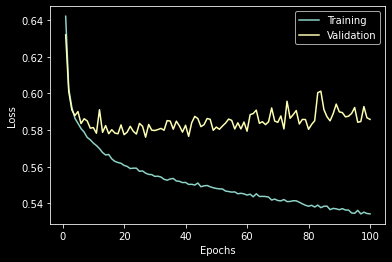

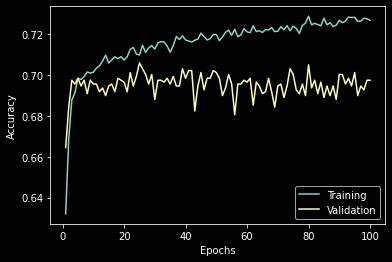

In [31]:
x_plot = list(range(1,101))

def plot_history(history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, history.history['loss'])
    plt.plot(x_plot, history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, history.history['accuracy'])
    plt.plot(x_plot, history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(history)

## Regularization

### L1

In [32]:
inputs = keras.Input(shape = (x_train.shape[1]))
x = layers.Dense(32, activation = activation, kernel_initializer=initializer, kernel_regularizer=regularizers.l1(0.01)) (inputs)
x = layers.Dense(16, activation = activation, kernel_initializer=initializer, kernel_regularizer=regularizers.l1(0.01)) (x)
x = layers.Dense(1, activation= "sigmoid", kernel_initializer=initializer) (x)
model_l1 = keras.Model(inputs, x)
model_l1.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=["accuracy", f1]) 

history = model_l1.fit(x_train, y_train, batch_size=16, epochs=100, verbose=0, validation_data=(x_validation, y_validation))

In [33]:
history.history['accuracy'][-1] 

0.5013578534126282

### L2

In [34]:
inputs = keras.Input(shape = (x_train.shape[1]))
x = layers.Dense(32, activation = activation, kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01)) (inputs)
x = layers.Dense(16, activation = activation, kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01)) (x)
x = layers.Dense(1, activation= "sigmoid", kernel_initializer=initializer) (x)
model_l2 = keras.Model(inputs, x)
model_l2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=["accuracy", f1]) 

history = model_l2.fit(x_train, y_train, batch_size=16, epochs=100, verbose=1, validation_data=(x_validation, y_validation))

Epoch 1/100
599/599 [==============================] - 2s 4ms/step - loss: 0.7733 - accuracy: 0.6054 - f1: 0.5857 - val_loss: 0.6738 - val_accuracy: 0.6147 - val_f1: 0.6314
Epoch 2/100
599/599 [==============================] - 2s 3ms/step - loss: 0.6592 - accuracy: 0.6583 - f1: 0.6152 - val_loss: 0.6602 - val_accuracy: 0.6786 - val_f1: 0.5877
Epoch 3/100
599/599 [==============================] - 2s 3ms/step - loss: 0.6486 - accuracy: 0.6707 - f1: 0.6093 - val_loss: 0.6502 - val_accuracy: 0.6823 - val_f1: 0.6038
Epoch 4/100
599/599 [==============================] - 2s 4ms/step - loss: 0.6429 - accuracy: 0.6794 - f1: 0.6032 - val_loss: 0.6442 - val_accuracy: 0.6842 - val_f1: 0.6200
Epoch 5/100
599/599 [==============================] - 2s 3ms/step - loss: 0.6389 - accuracy: 0.6827 - f1: 0.6054 - val_loss: 0.6444 - val_accuracy: 0.6551 - val_f1: 0.6250
Epoch 6/100
599/599 [==============================] - 2s 3ms/step - loss: 0.6360 - accuracy: 0.6833 - f1: 0.6079 - val_loss: 0.6395 - 

599/599 [==============================] - 2s 3ms/step - loss: 0.6006 - accuracy: 0.6978 - f1: 0.6216 - val_loss: 0.6093 - val_accuracy: 0.6908 - val_f1: 0.6179
Epoch 96/100
599/599 [==============================] - 2s 3ms/step - loss: 0.5997 - accuracy: 0.6979 - f1: 0.6255 - val_loss: 0.6069 - val_accuracy: 0.6955 - val_f1: 0.6344
Epoch 97/100
599/599 [==============================] - 2s 3ms/step - loss: 0.6008 - accuracy: 0.6967 - f1: 0.6210 - val_loss: 0.6071 - val_accuracy: 0.6964 - val_f1: 0.6428
Epoch 98/100
599/599 [==============================] - 2s 3ms/step - loss: 0.6009 - accuracy: 0.6971 - f1: 0.6225 - val_loss: 0.6074 - val_accuracy: 0.6955 - val_f1: 0.6442
Epoch 99/100
599/599 [==============================] - 2s 3ms/step - loss: 0.6007 - accuracy: 0.6964 - f1: 0.6222 - val_loss: 0.6075 - val_accuracy: 0.6898 - val_f1: 0.6200
Epoch 100/100
599/599 [==============================] - 2s 3ms/step - loss: 0.6004 - accuracy: 0.6979 - f1: 0.6269 - val_loss: 0.6132 - val_ac

In [35]:
history.history['accuracy'][-1] 

0.6979318857192993

### Dropout

In [36]:
inputs = keras.Input(shape = (x_train.shape[1]))
x = layers.Dense(32, activation = activation, kernel_initializer=initializer) (inputs)
x = layers.Dropout(0.2)(x)
x = layers.Dense(16, activation = activation, kernel_initializer=initializer) (x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation= "sigmoid", kernel_initializer=initializer) (x)
model_dp = keras.Model(inputs, x)
model_dp.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=["accuracy", f1]) 

In [37]:
history = model_dp.fit(x_train, y_train, batch_size=16, epochs=100, verbose=1, validation_data=(x_validation, y_validation))

Epoch 1/100
599/599 [==============================] - 2s 3ms/step - loss: 0.6571 - accuracy: 0.6044 - f1: 0.5702 - val_loss: 0.6244 - val_accuracy: 0.6607 - val_f1: 0.6104
Epoch 2/100
599/599 [==============================] - 2s 3ms/step - loss: 0.6182 - accuracy: 0.6645 - f1: 0.6043 - val_loss: 0.6129 - val_accuracy: 0.6720 - val_f1: 0.5863
Epoch 3/100
599/599 [==============================] - 2s 3ms/step - loss: 0.6059 - accuracy: 0.6732 - f1: 0.6021 - val_loss: 0.6031 - val_accuracy: 0.6833 - val_f1: 0.6125
Epoch 4/100
599/599 [==============================] - 2s 3ms/step - loss: 0.6003 - accuracy: 0.6809 - f1: 0.6038 - val_loss: 0.5971 - val_accuracy: 0.6927 - val_f1: 0.6219
Epoch 5/100
599/599 [==============================] - 2s 3ms/step - loss: 0.5970 - accuracy: 0.6888 - f1: 0.6157 - val_loss: 0.5930 - val_accuracy: 0.6992 - val_f1: 0.6290
Epoch 6/100
599/599 [==============================] - 2s 3ms/step - loss: 0.5950 - accuracy: 0.6885 - f1: 0.6080 - val_loss: 0.5934 - 

Epoch 95/100
599/599 [==============================] - 2s 3ms/step - loss: 0.5542 - accuracy: 0.7142 - f1: 0.6786 - val_loss: 0.5800 - val_accuracy: 0.7011 - val_f1: 0.6716
Epoch 96/100
599/599 [==============================] - ETA: 0s - loss: 0.5536 - accuracy: 0.7157 - f1: 0.680 - 2s 3ms/step - loss: 0.5548 - accuracy: 0.7149 - f1: 0.6799 - val_loss: 0.5776 - val_accuracy: 0.7077 - val_f1: 0.6830
Epoch 97/100
599/599 [==============================] - 2s 3ms/step - loss: 0.5563 - accuracy: 0.7120 - f1: 0.6730 - val_loss: 0.5842 - val_accuracy: 0.7021 - val_f1: 0.6802
Epoch 98/100
599/599 [==============================] - 2s 3ms/step - loss: 0.5573 - accuracy: 0.7176 - f1: 0.6867 - val_loss: 0.5787 - val_accuracy: 0.7058 - val_f1: 0.6786
Epoch 99/100
599/599 [==============================] - 2s 3ms/step - loss: 0.5556 - accuracy: 0.7147 - f1: 0.6789 - val_loss: 0.5805 - val_accuracy: 0.7002 - val_f1: 0.6746
Epoch 100/100
599/599 [==============================] - 2s 4ms/step - los

In [38]:
history.history['f1'][-1] 

0.671718955039978

In [39]:
model_dp.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 23)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                768       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
____________________________________________________

### Early Stopping

In [108]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

inputs = keras.Input(shape = (x_train.shape[1]))
x = layers.Dense(32, activation = activation, kernel_initializer=initializer) (inputs)
x = layers.Dense(16, activation = activation, kernel_initializer=initializer) (x)
x = layers.Dense(1, activation= "sigmoid", kernel_initializer=initializer) (x)
model_es = keras.Model(inputs, x)
model_es.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=["accuracy", f1]) 

history = model_es.fit(x_train, y_train, batch_size=16, epochs=1000, verbose=1, callbacks=[callback], validation_data=(x_validation, y_validation))

Epoch 1/1000
599/599 [==============================] - 1s 2ms/step - loss: 0.6445 - accuracy: 0.6182 - f1: 0.6164 - val_loss: 0.6214 - val_accuracy: 0.6607 - val_f1: 0.5807
Epoch 2/1000
599/599 [==============================] - 1s 1ms/step - loss: 0.6023 - accuracy: 0.6764 - f1: 0.6056 - val_loss: 0.6017 - val_accuracy: 0.6805 - val_f1: 0.5991
Epoch 3/1000
599/599 [==============================] - 1s 1ms/step - loss: 0.5928 - accuracy: 0.6837 - f1: 0.6062 - val_loss: 0.5968 - val_accuracy: 0.6842 - val_f1: 0.6337
Epoch 4/1000
599/599 [==============================] - 1s 1ms/step - loss: 0.5882 - accuracy: 0.6929 - f1: 0.6160 - val_loss: 0.5903 - val_accuracy: 0.7039 - val_f1: 0.6446
Epoch 5/1000
599/599 [==============================] - 1s 1ms/step - loss: 0.5833 - accuracy: 0.6961 - f1: 0.6210 - val_loss: 0.5884 - val_accuracy: 0.6974 - val_f1: 0.6424
Epoch 6/1000
599/599 [==============================] - 1s 1ms/step - loss: 0.5803 - accuracy: 0.7006 - f1: 0.6308 - val_loss: 0.5

Epoch 48/1000
599/599 [==============================] - 1s 1ms/step - loss: 0.5453 - accuracy: 0.7205 - f1: 0.6731 - val_loss: 0.5896 - val_accuracy: 0.6992 - val_f1: 0.6420
Epoch 49/1000
599/599 [==============================] - 1s 2ms/step - loss: 0.5448 - accuracy: 0.7217 - f1: 0.6751 - val_loss: 0.5877 - val_accuracy: 0.7039 - val_f1: 0.6589
Epoch 50/1000
599/599 [==============================] - 1s 2ms/step - loss: 0.5436 - accuracy: 0.7200 - f1: 0.6740 - val_loss: 0.5807 - val_accuracy: 0.6983 - val_f1: 0.6603
Epoch 51/1000
599/599 [==============================] - 1s 2ms/step - loss: 0.5432 - accuracy: 0.7239 - f1: 0.6773 - val_loss: 0.5885 - val_accuracy: 0.7002 - val_f1: 0.6528
Epoch 52/1000
599/599 [==============================] - 1s 2ms/step - loss: 0.5433 - accuracy: 0.7225 - f1: 0.6750 - val_loss: 0.5857 - val_accuracy: 0.7049 - val_f1: 0.6785
Epoch 53/1000
599/599 [==============================] - 1s 2ms/step - loss: 0.5423 - accuracy: 0.7241 - f1: 0.6767 - val_los

In [109]:
history.history['f1'][-1] 

0.6789836883544922

### Weights

In [42]:
# Modello base
print('Layers name:', model.weights[2].name)
print('Layers kernel shape:', model.weights[2].shape)
model.weights[2][0]

Layers name: dense_1/kernel:0
Layers kernel shape: (32, 16)


<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([ 0.43529373, -0.6742136 , -0.7994267 , -0.22276668, -0.22995982,
       -0.05880404, -2.3265119 ,  0.20051925, -0.42677957,  0.3047505 ,
       -1.6481214 , -0.14929147, -0.23323765, -0.4052721 , -0.2023902 ,
       -1.1187267 ], dtype=float32)>

In [43]:
# L1
print('Layers name:', model_l1.weights[2].name)
print('Layers kernel shape:', model_l1.weights[2].shape)
model_l1.weights[2][0]

Layers name: dense_4/kernel:0
Layers kernel shape: (32, 16)


<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([-7.2729265e-05,  3.3923039e-05, -1.1370041e-05, -1.6648594e-04,
        1.8302238e-04, -1.9235510e-04,  1.2843564e-04, -1.4457179e-04,
        2.3424145e-05,  1.7312216e-04, -1.0438403e-04,  2.3451788e-04,
        2.8764101e-04, -4.6867935e-05,  2.6548587e-05, -1.5786476e-04],
      dtype=float32)>

In [44]:
# L2
print('Layers name:', model_l2.weights[2].name)
print('Layers kernel shape:', model_l2.weights[2].shape)
model_l2.weights[2][0]

Layers name: dense_7/kernel:0
Layers kernel shape: (32, 16)


<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([-4.2829743e-34, -1.2056933e-34, -4.0964683e-34, -4.0771291e-34,
       -1.9397188e-34,  2.4399272e-34, -1.5849209e-34, -7.3021411e-35,
       -6.2040606e-35,  2.9330728e-34, -5.1948264e-34,  1.9208367e-34,
       -3.9036900e-34, -4.7051439e-34, -4.2240852e-34, -5.7401984e-34],
      dtype=float32)>

In [45]:
# Dropout
print('Layers name:', model_dp.weights[2].name)
print('Layers kernel shape:', model_dp.weights[2].shape)
model_dp.weights[2][0]

Layers name: dense_10/kernel:0
Layers kernel shape: (32, 16)


<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([ 0.56900483,  0.13750613, -0.19790792, -0.61615354, -1.1692492 ,
       -0.13832512, -1.220441  ,  0.65251255, -1.048538  , -0.14049156,
        0.12955295, -0.89815265, -0.02346293, -1.1784271 , -0.18125024,
       -1.153822  ], dtype=float32)>

In [46]:
# Early Stopping
print('Layers name:', model_es.weights[2].name)
print('Layers kernel shape:', model_es.weights[2].shape)
model_es.weights[2][0]

Layers name: dense_13/kernel:0
Layers kernel shape: (32, 16)


<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([ 0.20523901,  0.21847332, -0.11663888, -0.20886618, -0.20247419,
       -0.14586775, -0.03810836,  0.14671227, -0.2896162 ,  0.28275293,
       -0.11931517, -0.33590248,  0.02666965, -0.24132584,  0.2776565 ,
       -0.14119625], dtype=float32)>

In [47]:
print('Sum of the values of the weights without regularization:', sum(abs(model.weights[2][0])).numpy())
print('Sum of the values of the weights with regularization l1:', sum(abs(model_l1.weights[2][0])).numpy())
print('Sum of the values of the weights with regularization l2:', sum(abs(model_l2.weights[2][0])).numpy())
print('Sum of the values of the weights with dropout:', sum(abs(model_dp.weights[2][0])).numpy())
print('Sum of the values of the weights with early stopping:',sum(abs(model_es.weights[2][0])).numpy())

Sum of the values of the weights without regularization: 9.436066
Sum of the values of the weights with regularization l1: 0.0019872636
Sum of the values of the weights with regularization l2: 4.959931e-33
Sum of the values of the weights with dropout: 9.454798
Sum of the values of the weights with early stopping: 2.9968152


### Test with Feature Selection

In [76]:
x_train_pulito["target"]=y_train_finale
x_train_pulito

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
18590,10000.0,1,2,2,27,1,-1,0,0,0,...,6368.0,9046.0,10000.0,4475.0,2000.0,2000.0,2780.0,2000.0,0.0,0
10898,330000.0,2,1,2,31,-1,0,0,0,0,...,5186.0,6522.0,8995.0,1091.0,2000.0,1222.0,2400.0,3000.0,2000.0,0
18252,240000.0,2,1,1,53,-2,-2,-1,-1,-2,...,-40.0,-40.0,8091.0,0.0,2007.0,40.0,0.0,8131.0,0.0,0
267,20000.0,2,1,2,23,0,0,2,0,0,...,8444.0,8621.0,8868.0,2424.0,0.0,284.0,294.0,371.0,500.0,0
2210,20000.0,1,2,2,24,1,3,2,2,3,...,8367.0,7945.0,7669.0,0.0,0.0,1300.0,0.0,0.0,1000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,280000.0,2,1,1,32,1,-2,-1,0,0,...,3508.0,-200.0,-200.0,0.0,3508.0,0.0,0.0,0.0,0.0,1
23993,160000.0,2,2,1,42,0,0,0,0,0,...,119529.0,122059.0,111378.0,8450.0,5289.0,4022.0,4195.0,3986.0,3958.0,1
23996,200000.0,1,1,2,37,2,2,2,2,2,...,164182.0,169029.0,172084.0,13500.0,6000.0,0.0,7500.0,6000.0,4000.0,1
23998,70000.0,2,2,2,25,0,0,0,0,2,...,35122.0,28633.0,28039.0,3000.0,2000.0,4500.0,1200.0,0.0,1200.0,1


In [77]:
x_train_pulito.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
LIMIT_BAL,1.000000,0.024640,-0.238396,-0.105411,0.140672,-0.273570,-0.311160,-0.302873,-0.288922,-0.268920,...,0.311386,0.314626,0.304883,0.204331,0.226463,0.222910,0.221233,0.216739,0.240915,-0.185130
SEX,0.024640,1.000000,0.014579,-0.021531,-0.099094,-0.062094,-0.072094,-0.080041,-0.070898,-0.065723,...,-0.024492,-0.025067,-0.026465,-0.007629,-0.010014,0.000867,-0.013286,0.005857,0.000266,-0.049689
EDUCATION,-0.238396,0.014579,1.000000,-0.125638,0.167614,0.096383,0.108417,0.102690,0.105375,0.088876,...,-0.012548,-0.020189,-0.018098,-0.028409,-0.028755,-0.050877,-0.039101,-0.032545,-0.043236,0.026872
MARRIAGE,-0.105411,-0.021531,-0.125638,1.000000,-0.421517,0.003680,0.015611,0.026456,0.025273,0.031637,...,-0.028512,-0.031822,-0.025724,-0.009162,-0.025014,-0.007784,-0.011699,0.012935,-0.007144,-0.024567
AGE,0.140672,-0.099094,0.167614,-0.421517,1.000000,-0.027742,-0.038924,-0.043005,-0.043119,-0.052793,...,0.041942,0.041026,0.039202,0.024976,0.027789,0.006897,0.011190,0.017397,0.015753,0.014195
PAY_0,-0.273570,-0.062094,0.096383,0.003680,-0.027742,1.000000,0.678422,0.590470,0.547399,0.514938,...,0.186703,0.190673,0.185719,-0.074011,-0.081188,-0.064779,-0.065659,-0.056853,-0.056615,0.347121
PAY_2,-0.311160,-0.072094,0.108417,0.015611,-0.038924,0.678422,1.000000,0.778501,0.654107,0.616070,...,0.210099,0.214252,0.211542,-0.087009,-0.080154,-0.056323,-0.045761,-0.046089,-0.044280,0.284662
PAY_3,-0.302873,-0.080041,0.102690,0.026456,-0.043005,0.590470,0.778501,1.000000,0.780467,0.692203,...,0.213747,0.215305,0.210570,0.005126,-0.090312,-0.050323,-0.043769,-0.046342,-0.032264,0.258731
PAY_4,-0.288922,-0.070898,0.105375,0.025273,-0.043119,0.547399,0.654107,0.780467,1.000000,0.832803,...,0.210149,0.213314,0.211096,-0.018058,-0.014848,-0.068996,-0.043948,-0.043636,-0.030255,0.236763
PAY_5,-0.268920,-0.065723,0.088876,0.031637,-0.052793,0.514938,0.616070,0.692203,0.832803,1.000000,...,0.232293,0.236025,0.231964,-0.012443,-0.010312,0.000661,-0.061787,-0.039559,-0.022616,0.220256


In [78]:
prova = x_train_pulito.corr()

In [79]:
prova=prova.loc[(prova["target"]>=0)]
print(prova.index)
x_train=x_train_pulito[prova.index]

Index(['EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT5', 'BILL_AMT6', 'target'],
      dtype='object')


In [80]:
y=x_train["target"]
del x_train["target"]

In [81]:
x_train, _ = preprocess_data(x_train)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y, test_size=0.1, random_state=0)

In [82]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

inputs = keras.Input(shape = (x_train.shape[1]))
x = layers.Dense(32, activation = activation, kernel_initializer=initializer) (inputs)
x = layers.Dense(16, activation = activation, kernel_initializer=initializer) (x)
x = layers.Dense(1, activation= "sigmoid", kernel_initializer=initializer) (x)
model_test = keras.Model(inputs, x)
model_test.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=["accuracy", f1]) 

history = model_test.fit(x_train, y_train, batch_size=16, epochs=1000, verbose=1, callbacks=[callback], validation_data=(x_validation, y_validation))

Epoch 1/1000
599/599 [==============================] - 1s 2ms/step - loss: 0.6508 - accuracy: 0.6042 - f1: 0.6049 - val_loss: 0.6136 - val_accuracy: 0.6739 - val_f1: 0.6022
Epoch 2/1000
599/599 [==============================] - 1s 1ms/step - loss: 0.6000 - accuracy: 0.6876 - f1: 0.5996 - val_loss: 0.6062 - val_accuracy: 0.6842 - val_f1: 0.5945
Epoch 3/1000
599/599 [==============================] - 1s 1ms/step - loss: 0.5915 - accuracy: 0.6941 - f1: 0.6173 - val_loss: 0.5964 - val_accuracy: 0.7021 - val_f1: 0.6405
Epoch 4/1000
599/599 [==============================] - 1s 1ms/step - loss: 0.5899 - accuracy: 0.6961 - f1: 0.6240 - val_loss: 0.5988 - val_accuracy: 0.6955 - val_f1: 0.6261
Epoch 5/1000
599/599 [==============================] - 1s 1ms/step - loss: 0.5875 - accuracy: 0.6978 - f1: 0.6242 - val_loss: 0.5951 - val_accuracy: 0.6945 - val_f1: 0.6356
Epoch 6/1000
599/599 [==============================] - 1s 1ms/step - loss: 0.5847 - accuracy: 0.6990 - f1: 0.6287 - val_loss: 0.5

In [83]:
history.history['f1'][-1] 

0.6597654223442078

### Test Prediction

In [110]:
x_test = pd.read_csv("X_test.csv", index_col=False)

In [111]:
x_test

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2309,30000.0,1,2,2,25,0,0,0,0,...,11581.0,12580.0,13716.0,14828.0,1500.0,2000.0,1500.0,1500.0,1500.0,2000.0
1,22405,150000.0,2,1,2,26,0,0,0,0,...,116684.0,101581.0,77741.0,77264.0,4486.0,4235.0,3161.0,2647.0,2669.0,2669.0
2,23398,70000.0,2,3,1,32,0,0,0,0,...,68530.0,69753.0,70111.0,70212.0,2431.0,3112.0,3000.0,2438.0,2500.0,2554.0
3,25059,130000.0,1,3,2,49,0,0,0,0,...,16172.0,16898.0,11236.0,6944.0,1610.0,1808.0,7014.0,27.0,7011.0,4408.0
4,2665,50000.0,2,2,2,36,0,0,0,0,...,42361.0,19574.0,20295.0,19439.0,2000.0,1500.0,1000.0,1800.0,0.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2211,360000.0,2,1,2,27,1,-2,-1,-1,...,830.0,0.0,1271.0,179.0,0.0,830.0,0.0,1271.0,179.0,1970.0
5996,14145,500000.0,2,1,2,28,2,0,0,2,...,111690.0,78070.0,78376.0,80912.0,6000.0,13151.0,0.0,3000.0,5000.0,10000.0
5997,23109,60000.0,2,1,1,28,0,0,0,0,...,48696.0,50385.0,52045.0,52661.0,2100.0,2500.0,2500.0,2500.0,1600.0,1500.0
5998,25704,20000.0,2,1,2,29,1,-1,-1,-1,...,3967.0,1364.0,600.0,0.0,2494.0,3967.0,1370.0,600.0,0.0,0.0


In [112]:
x_test["EDUCATION"].value_counts()

2    2844
1    2104
3     958
5      56
4      26
6       8
0       4
Name: EDUCATION, dtype: int64

In [113]:
x_test = x_test.loc[(x_test["EDUCATION"]!=0)]

In [114]:
x_test["MARRIAGE"].value_counts()

2    3214
1    2716
3      57
0       9
Name: MARRIAGE, dtype: int64

In [115]:
x_test = x_test.loc[(x_test["MARRIAGE"]!=0)]

In [117]:
x_test = x_test.drop(['ID'], axis=1)

In [118]:
x_test, _ = preprocess_data(x_test, x_scaler)

In [138]:
y_test = model_es.predict(x_test)

In [141]:
y_test.round()

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [142]:
file = open("Gabriele_Ferrario_817518_score2.txt", "w")
for row in y_test.round():
    np.savetxt(file, row)

file.close()